In [133]:
import numpy as np
import pandas as pd 

In [134]:
df = pd.read_csv('archive/Cancer_Data.csv')
df.head(10)
# df.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [135]:

info_df = pd.DataFrame()
info_df['missing_val'] = df.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)
info_df


,missing_val,missing_val_ratio
id,0,0
diagnosis,0,0
radius_mean,0,0
texture_mean,0,0
perimeter_mean,0,0
area_mean,0,0
smoothness_mean,0,0
compactness_mean,0,0
concavity_mean,0,0
concave points_mean,0,0


In [136]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [137]:
s = df['diagnosis']
pd.get_dummies(s)

,B,M
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
564,False,True
565,False,True
566,False,True
567,False,True


In [138]:
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer()
label_binarizer.fit(s) # need to be global or remembered to use it later

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return label_binarizer.transform(x)  
d = one_hot_encode(s)       
df['label_encoding'] = d+1

In [139]:
df['label_encoding'].value_counts()

label_encoding
1    357
2    212
Name: count, dtype: int64

In [140]:
X_raw = df[['area_se', 'perimeter_se', 'radius_se', 'compactness_worst',
       'compactness_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
       'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst',
       'concave points_mean', 'perimeter_worst', 'concave points_worst']]
                  
# Define y_raw as the 'diagnosis' column                  
y = df['label_encoding']

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Scaling the raw input features
X = scaler.fit_transform(X_raw)

#schecking what we done
print(f"The range of feature inputs are within {X.min()} to {X.max()}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

The range of feature inputs are within 0.0 to 1.0000000000000002


In [142]:
X_train.shape

(455, 15)

In [143]:
y_train.shape

(455,)

In [144]:
layers_dims = [15, 10, 5, 1]
X_train_transposed = X_train.T
y_train_transposed = y_train.values.reshape(1, -1)
X_train_transposed.shape
y_train_transposed.shape

(1, 455)

In [151]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []  
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X,parameters)
        m = Y.shape[1]
        AL = np.clip(AL, 1e-10, 1 - 1e-10)
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

        cost = np.squeeze(cost)
    
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [162]:
parameters, costs = L_layer_model(X_train_transposed, y_train_transposed, layers_dims, num_iterations = 25000, print_cost = True)

Cost after iteration 0: -8.60306515156377
Cost after iteration 100: -8.60306515156377
Cost after iteration 200: -8.60306515156377
Cost after iteration 300: -8.60306515156377
Cost after iteration 400: -8.60306515156377
Cost after iteration 500: -8.60306515156377
Cost after iteration 600: -8.60306515156377
Cost after iteration 700: -8.60306515156377
Cost after iteration 800: -8.60306515156377
Cost after iteration 900: -8.60306515156377
Cost after iteration 1000: -8.60306515156377
Cost after iteration 1100: -8.60306515156377
Cost after iteration 1200: -8.60306515156377
Cost after iteration 1300: -8.60306515156377
Cost after iteration 1400: -8.60306515156377
Cost after iteration 1500: -8.60306515156377
Cost after iteration 1600: -8.60306515156377
Cost after iteration 1700: -8.60306515156377
Cost after iteration 1800: -8.60306515156377
Cost after iteration 1900: -8.60306515156377
Cost after iteration 2000: -8.60306515156377
Cost after iteration 2100: -8.60306515156377
Cost after iteration 2

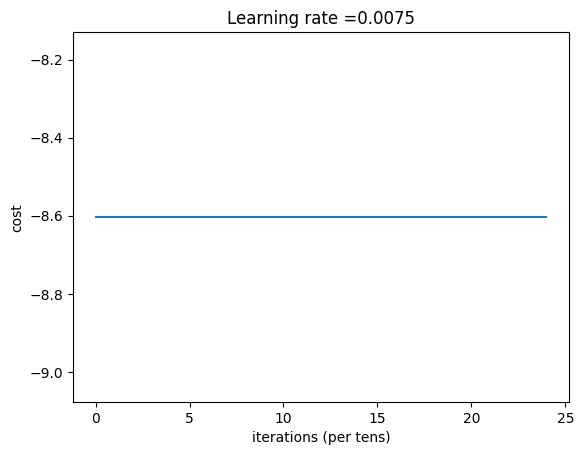

In [161]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()